# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

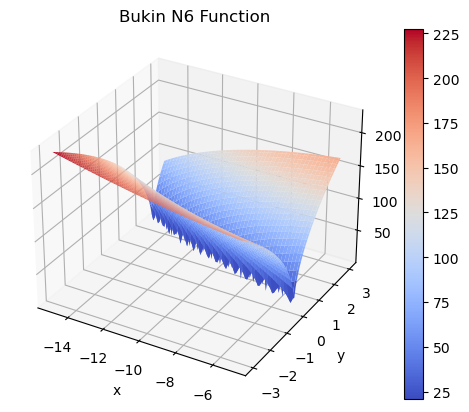

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def bukin(x, y): 
    return 100 * np.sqrt(np.abs(y - 0.01 * x**2)) + 0.01 * np.abs(x + 10)

x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Compute the function values for each (x, y) pair
Z = bukin(X, Y)

# Create a contour plot of the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')
fig.colorbar(surf)
ax.set_title('Bukin N6 Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()


*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

def bukin(x, y): 
    return 100 * np.sqrt(np.abs(y - 0.01 * x**2)) + 0.01 * np.abs(x + 10)
define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [2]:
def bukin2(point): 
    return 100 * np.sqrt(np.abs(point[1] - 0.01 * point[0]**2)) + 0.01 * np.abs(point[0] + 10)


def hillClimb(point, f):
    STEP = 0.1
    while True:
        best_point = point
        best_value = f(best_point)
        print(f"Running for point {best_point} with value {best_value}")
        for dim in range(0, len(point.shape)):
            neighbor_dir = np.zeros_like(point)
            neighbor_dir[dim] = 1
            for d in [-1, 1]:
                neighbor = point + neighbor_dir * d * STEP
                neighbor_value = f(neighbor)
                if neighbor_value < best_value:
                    best_value = neighbor_value
                    best_point = neighbor
        if (best_point == point).all():
            break
        point = best_point
    return point

best = hillClimb(np.array([-11, 1]), bukin2)
print(f"Found local best {best} with cost {bukin2(best)}")

Running for point [-11   1] with value 45.835756949558395
Running for point [-10.9   1. ] with value 43.3794968844029
Running for point [-10.8   1. ] with value 40.80015610874229
Running for point [-10.7   1. ] with value 38.07273262134859
Running for point [-10.6   1. ] with value 35.162791662493945
Running for point [-10.5   1. ] with value 32.020621187164316
Running for point [-10.4   1. ] with value 28.56971371417146
Running for point [-10.3   1. ] with value 24.68092535850621
Running for point [-10.2   1. ] with value 20.101751242241942
Running for point [-10.1   1. ] with value 14.178446878758063
Running for point [-10.   1.] with value 2.580956827987312e-06
Found local best [-10.   1.] with cost 2.580956827987312e-06


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [3]:
def hillclimb_knapsack(weights, limit):
    selection = np.zeros_like(weights)
    
    while True:
        best = selection
        best_cost = (weights * best).sum()
        for i in range(0, best.shape[0]):
            neighbor = np.copy(selection)
            neighbor[i] = 1
            neighbor_cost = (weights * neighbor).sum()
            if neighbor_cost > best_cost and limit >= neighbor_cost:
                best_cost = neighbor_cost
                best = neighbor
        if (best == selection).all():
            break
        selection = best
    return selection

weights = np.array([2, 4, 5])
limit = 5
selected = (weights[hillclimb_knapsack(weights, limit) == 1])
print(f"Selected {selected} from weights {weights} and limit {limit}")

weights = np.array([2, 4, 5])
limit = 6
selected = (weights[hillclimb_knapsack(weights, limit) == 1])
print(f"Selected {selected} from weights {weights} and limit {limit}")

Selected [5] from weights [2 4 5] and limit 5
Selected [5] from weights [2 4 5] and limit 6



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [4]:
def hillclimb_knapsack2(weights, limit):
    selection = np.zeros_like(weights)
    
    while True:
        best = selection
        best_cost = (weights * best).sum()
        for i in range(0, best.shape[0]):
            neighbor = np.copy(selection)
            neighbor[i] = 1 - neighbor[i]
            neighbor_cost = (weights * neighbor).sum()
            if neighbor_cost > best_cost and limit >= neighbor_cost:
                best_cost = neighbor_cost
                best = neighbor
        for i in range(0, best.shape[0]):
            for j in range(i + 1, best.shape[0]):
                neighbor = np.copy(selection)
                neighbor[i] = 1 - neighbor[i]
                neighbor[j] = 1 - neighbor[j]
                neighbor_cost = (weights * neighbor).sum()
                if neighbor_cost > best_cost and limit >= neighbor_cost:
                    best_cost = neighbor_cost
                    best = neighbor
        if (best == selection).all():
            break
        selection = best
    return selection

weights = np.array([2, 4, 5])
limit = 6
selected = (weights[hillclimb_knapsack2(weights, limit) == 1])
print(f"Selected {selected} from weights {weights} and limit {limit}")
weights = np.array([1, 7, 4, 4, 1])
limit = 10
selected = (weights[hillclimb_knapsack2(weights, limit) == 1])
print(f"Selected {selected} from weights {weights} and limit {limit}")

Selected [2 4] from weights [2 4 5] and limit 6
Selected [1 7 1] from weights [1 7 4 4 1] and limit 10
